In [1]:
import numpy as np
import pandas as pd
import scipy
import math
import statsmodels

In [2]:
df_PB = pd.read_excel('HS300150101_PB.xlsx')
df_value = pd.read_excel('HS300150101_Value.xlsx')
df_price = pd.read_excel('HS300150101_Price.xlsx')

In [3]:
#importing PB of companies

df_PB = df_PB.set_index('date')
df_PB

,平安银行000001.SZ,万科A000002.SZ,中兴通讯000063.SZ,华侨城A000069.SZ,TCL集团000100.SZ,中联重科000157.SZ,申万宏源000166.SZ,美的集团000333.SZ,潍柴动力000338.SZ,金融街000402.SZ,...,养元饮品603156.SH,汇顶科技603160.SH,药明康德603259.SH,合盛硅业603260.SH,海天味业603288.SH,华友钴业603799.SH,欧派家居603833.SH,步长制药603858.SH,兆易创新603986.SH,洛阳钼业603993.SH
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1.3977,1.8666,2.6267,2.2291,2.0937,1.3456,0.0000,3.1915,1.7969,1.4996,...,0.0000,0.0000,0.0000,0.0000,8.1425,0.0000,0.0000,0.0000,0.0000,3.3405
2015-01-06,1.3768,1.7978,2.7787,2.1412,2.1560,1.3117,0.0000,3.3869,1.8443,1.4082,...,0.0000,0.0000,0.0000,0.0000,8.3533,0.0000,0.0000,0.0000,0.0000,3.4376
2015-01-07,1.3506,1.7815,2.7234,2.1127,2.1664,1.3305,0.0000,3.3805,1.8400,1.3984,...,0.0000,0.0000,0.0000,0.0000,8.2188,0.0000,0.0000,0.0000,0.0000,3.5556
2015-01-08,1.3052,1.7014,2.7621,2.0300,2.0989,1.2834,0.0000,3.4286,1.7808,1.3453,...,0.0000,0.0000,0.0000,0.0000,8.3774,0.0000,0.0000,0.0000,0.0000,3.4584
2015-01-09,1.3157,1.6838,2.7013,2.0015,2.0781,1.2664,0.0000,3.3228,1.7655,1.3453,...,0.0000,0.0000,0.0000,0.0000,8.1746,0.0000,0.0000,0.0000,0.0000,3.4342
2015-01-12,1.2886,1.6425,2.6446,1.9524,2.0625,1.2060,0.0000,3.4200,1.7230,1.2712,...,0.0000,0.0000,0.0000,0.0000,8.2891,0.0000,0.0000,0.0000,0.0000,3.3683
2015-01-13,1.2808,1.6363,2.6543,1.9602,2.0833,1.2116,0.0000,3.5461,1.7328,1.2614,...,0.0000,0.0000,0.0000,0.0000,8.4035,0.0000,0.0000,0.0000,0.0000,3.2711
2015-01-14,1.2921,1.6400,2.6488,1.9731,2.0417,1.1928,0.0000,3.4051,1.7063,1.2787,...,0.0000,0.0000,0.0000,0.0000,8.3473,0.0000,0.0000,0.0000,0.0000,3.1809
2015-01-15,1.3392,1.7239,2.7151,2.0558,2.0625,1.2343,0.0000,3.4232,1.7667,1.3478,...,0.0000,0.0000,0.0000,0.0000,8.3553,0.0000,0.0000,0.0000,0.0000,3.2191


In [4]:
#importing market value of companies

df_value=df_value.set_index('date')
df_value

,平安银行000001.SZ,万科A000002.SZ,中兴通讯000063.SZ,华侨城A000069.SZ,TCL集团000100.SZ,中联重科000157.SZ,申万宏源000166.SZ,美的集团000333.SZ,潍柴动力000338.SZ,金融街000402.SZ,...,养元饮品603156.SH,汇顶科技603160.SH,药明康德603259.SH,合盛硅业603260.SH,海天味业603288.SH,华友钴业603799.SH,欧派家居603833.SH,步长制药603858.SH,兆易创新603986.SH,洛阳钼业603993.SH
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,183026814488,164569232978,65347659695,62678974264,38093225482,54943452376,0,125968357143,58339855266,36315498370,...,0,0,0,0,60970169000,0,0,0,0,48883522156
2015-01-06,180284839739,158498603995,69128955101,60206717738,39227515075,53556380648,0,133683286647,59879323688,34103690239,...,0,0,0,0,62548928000,0,0,0,0,50304849903
2015-01-07,176857371303,157063728054,67753938589,59406870039,39416563340,54326976052,0,133430338139,59739372013,33864575846,...,0,0,0,0,61541529400,0,0,0,0,52030747881
2015-01-08,170916426014,149999723419,68716450147,57080040368,38187749615,52400487540,0,135327451951,57820034760,32579335986,...,0,0,0,0,62729357600,0,0,0,0,50609420134
2015-01-09,172287413388,148454472405,67203931985,56280192668,37809653084,51706951676,0,131153801564,57320207350,32579335986,...,0,0,0,0,61210741800,0,0,0,0,50254088198
2015-01-12,168745696004,144812095015,65794540061,54898637551,37526080686,49241046380,0,134990187273,55940683699,30785978042,...,0,0,0,0,62067782400,0,0,0,0,49289615798
2015-01-13,167717455473,144260219653,66035167950,55116777833,37904177217,49472225001,0,139964841270,56260573241,30546863650,...,0,0,0,0,62924823000,0,0,0,0,47868288051
2015-01-14,169202691795,144591344870,65897666299,55480344969,37147984155,48701629596,0,134399974087,55400870097,30965313837,...,0,0,0,0,62503820600,0,0,0,0,46548483714
2015-01-15,175372134980,151986474722,67547686113,57807174640,37526080686,50396939487,0,135116661528,57360193543,32639114584,...,0,0,0,0,62563963800,0,0,0,0,47106862472


In [5]:
#importing price of stocks

df_price=df_price.set_index('date')
df_price

,平安银行000001.SZ,万科A000002.SZ,中兴通讯000063.SZ,华侨城A000069.SZ,TCL集团000100.SZ,中联重科000157.SZ,申万宏源000166.SZ,美的集团000333.SZ,潍柴动力000338.SZ,金融街000402.SZ,...,养元饮品603156.SH,汇顶科技603160.SH,药明康德603259.SH,合盛硅业603260.SH,海天味业603288.SH,华友钴业603799.SH,欧派家居603833.SH,步长制药603858.SH,兆易创新603986.SH,洛阳钼业603993.SH
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,16.02,14.91,19.01,8.62,4.03,7.13,0.00,29.88,29.18,12.15,...,0.00,0.00,0.00,0.00,40.55,0.00,0.00,0.00,0.00,9.63
2015-01-06,15.78,14.36,20.11,8.28,4.15,6.95,0.00,31.71,29.95,11.41,...,0.00,0.00,0.00,0.00,41.60,0.00,0.00,0.00,0.00,9.91
2015-01-07,15.48,14.23,19.71,8.17,4.17,7.05,0.00,31.65,29.88,11.33,...,0.00,0.00,0.00,0.00,40.93,0.00,0.00,0.00,0.00,10.25
2015-01-08,14.96,13.59,19.99,7.85,4.04,6.80,0.00,32.10,28.92,10.90,...,0.00,0.00,0.00,0.00,41.72,0.00,0.00,0.00,0.00,9.97
2015-01-09,15.08,13.45,19.55,7.74,4.00,6.71,0.00,31.11,28.67,10.90,...,0.00,0.00,0.00,0.00,40.71,0.00,0.00,0.00,0.00,9.90
2015-01-12,14.77,13.12,19.14,7.55,3.97,6.39,0.00,32.02,27.98,10.30,...,0.00,0.00,0.00,0.00,41.28,0.00,0.00,0.00,0.00,9.71
2015-01-13,14.68,13.07,19.21,7.58,4.01,6.42,0.00,33.20,28.14,10.22,...,0.00,0.00,0.00,0.00,41.85,0.00,0.00,0.00,0.00,9.43
2015-01-14,14.81,13.10,19.17,7.63,3.93,6.32,0.00,31.88,27.71,10.36,...,0.00,0.00,0.00,0.00,41.57,0.00,0.00,0.00,0.00,9.17
2015-01-15,15.35,13.77,19.65,7.95,3.97,6.54,0.00,32.05,28.69,10.92,...,0.00,0.00,0.00,0.00,41.61,0.00,0.00,0.00,0.00,9.28


In [6]:
# calculating book to price ratio
df_bp = df_PB.applymap(lambda x: 1/x if x!=0 else 0)

In [7]:
df_bp

,平安银行000001.SZ,万科A000002.SZ,中兴通讯000063.SZ,华侨城A000069.SZ,TCL集团000100.SZ,中联重科000157.SZ,申万宏源000166.SZ,美的集团000333.SZ,潍柴动力000338.SZ,金融街000402.SZ,...,养元饮品603156.SH,汇顶科技603160.SH,药明康德603259.SH,合盛硅业603260.SH,海天味业603288.SH,华友钴业603799.SH,欧派家居603833.SH,步长制药603858.SH,兆易创新603986.SH,洛阳钼业603993.SH
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,0.715461,0.535733,0.380706,0.448612,0.477623,0.743163,0.000000,0.313332,0.556514,0.666844,...,0.000000,0.000000,0.000000,0.000000,0.122812,0.000000,0.000000,0.000000,0.000000,0.299356
2015-01-06,0.726322,0.556235,0.359881,0.467028,0.463822,0.762369,0.000000,0.295255,0.542211,0.710126,...,0.000000,0.000000,0.000000,0.000000,0.119713,0.000000,0.000000,0.000000,0.000000,0.290901
2015-01-07,0.740412,0.561325,0.367188,0.473328,0.461595,0.751597,0.000000,0.295814,0.543478,0.715103,...,0.000000,0.000000,0.000000,0.000000,0.121672,0.000000,0.000000,0.000000,0.000000,0.281246
2015-01-08,0.766166,0.587751,0.362043,0.492611,0.476440,0.779180,0.000000,0.291664,0.561545,0.743329,...,0.000000,0.000000,0.000000,0.000000,0.119369,0.000000,0.000000,0.000000,0.000000,0.289151
2015-01-09,0.760052,0.593895,0.370192,0.499625,0.481209,0.789640,0.000000,0.300951,0.566412,0.743329,...,0.000000,0.000000,0.000000,0.000000,0.122330,0.000000,0.000000,0.000000,0.000000,0.291189
2015-01-12,0.776036,0.608828,0.378129,0.512190,0.484848,0.829187,0.000000,0.292398,0.580383,0.786658,...,0.000000,0.000000,0.000000,0.000000,0.120640,0.000000,0.000000,0.000000,0.000000,0.296886
2015-01-13,0.780762,0.611135,0.376747,0.510152,0.480008,0.825355,0.000000,0.282000,0.577101,0.792770,...,0.000000,0.000000,0.000000,0.000000,0.118998,0.000000,0.000000,0.000000,0.000000,0.305708
2015-01-14,0.773934,0.609756,0.377529,0.506817,0.489788,0.838364,0.000000,0.293677,0.586063,0.782044,...,0.000000,0.000000,0.000000,0.000000,0.119799,0.000000,0.000000,0.000000,0.000000,0.314376
2015-01-15,0.746714,0.580080,0.368311,0.486429,0.484848,0.810176,0.000000,0.292124,0.566027,0.741950,...,0.000000,0.000000,0.000000,0.000000,0.119685,0.000000,0.000000,0.000000,0.000000,0.310646


In [8]:
#calculating returns of each stock

date_index = df_price.index
company = df_price.columns
returns = pd.DataFrame(index=date_index,columns=company)

for i in range(len(company)):
    j=0
    for date in date_index:
        if j==0:
            returns.loc[date][company[i]] = 0
        else:
            if df_price.loc[date_index[j-1]][company[i]] == 0:
                returns.loc[date][company[i]] = 0
            else:
                returns.loc[date][company[i]] = df_price.loc[date][company[i]]/df_price.loc[date_index[j-1]][company[i]]-1
        j += 1
    
returns

,平安银行000001.SZ,万科A000002.SZ,中兴通讯000063.SZ,华侨城A000069.SZ,TCL集团000100.SZ,中联重科000157.SZ,申万宏源000166.SZ,美的集团000333.SZ,潍柴动力000338.SZ,金融街000402.SZ,...,养元饮品603156.SH,汇顶科技603160.SH,药明康德603259.SH,合盛硅业603260.SH,海天味业603288.SH,华友钴业603799.SH,欧派家居603833.SH,步长制药603858.SH,兆易创新603986.SH,洛阳钼业603993.SH
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-06,-0.0149813,-0.036888,0.0578643,-0.0394432,0.0297767,-0.0252454,0,0.061245,0.0263879,-0.0609053,...,0,0,0,0,0.025894,0,0,0,0,0.0290758
2015-01-07,-0.0190114,-0.00905292,-0.0198906,-0.013285,0.00481928,0.0143885,0,-0.00189215,-0.00233723,-0.00701139,...,0,0,0,0,-0.0161058,0,0,0,0,0.0343088
2015-01-08,-0.0335917,-0.0449754,0.014206,-0.0391677,-0.0311751,-0.035461,0,0.014218,-0.0321285,-0.0379523,...,0,0,0,0,0.0193012,0,0,0,0,-0.0273171
2015-01-09,0.00802139,-0.0103017,-0.022011,-0.0140127,-0.00990099,-0.0132353,0,-0.0308411,-0.00864454,0,...,0,0,0,0,-0.024209,0,0,0,0,-0.00702106
2015-01-12,-0.020557,-0.0245353,-0.0209719,-0.0245478,-0.0075,-0.04769,0,0.029251,-0.024067,-0.0550459,...,0,0,0,0,0.0140015,0,0,0,0,-0.0191919
2015-01-13,-0.00609343,-0.00381098,0.00365726,0.00397351,0.0100756,0.00469484,0,0.036852,0.00571837,-0.00776699,...,0,0,0,0,0.0138081,0,0,0,0,-0.0288363
2015-01-14,0.00885559,0.00229533,-0.00208225,0.00659631,-0.0199501,-0.0155763,0,-0.039759,-0.0152807,0.0136986,...,0,0,0,0,-0.00669056,0,0,0,0,-0.0275716
2015-01-15,0.0364619,0.051145,0.0250391,0.0419397,0.0101781,0.0348101,0,0.0053325,0.0353663,0.0540541,...,0,0,0,0,0.000962232,0,0,0,0,0.0119956


In [9]:
#putting the sequence of columns into a consistent order

df_value = df_value.reindex(columns=returns.columns)
df_bp = df_bp.reindex(columns=returns.columns)

In [10]:
df_value

,平安银行000001.SZ,万科A000002.SZ,中兴通讯000063.SZ,华侨城A000069.SZ,TCL集团000100.SZ,中联重科000157.SZ,申万宏源000166.SZ,美的集团000333.SZ,潍柴动力000338.SZ,金融街000402.SZ,...,养元饮品603156.SH,汇顶科技603160.SH,药明康德603259.SH,合盛硅业603260.SH,海天味业603288.SH,华友钴业603799.SH,欧派家居603833.SH,步长制药603858.SH,兆易创新603986.SH,洛阳钼业603993.SH
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,183026814488,164569232978,65347659695,62678974264,38093225482,54943452376,0,125968357143,58339855266,36315498370,...,0,0,0,0,60970169000,0,0,0,0,48883522156
2015-01-06,180284839739,158498603995,69128955101,60206717738,39227515075,53556380648,0,133683286647,59879323688,34103690239,...,0,0,0,0,62548928000,0,0,0,0,50304849903
2015-01-07,176857371303,157063728054,67753938589,59406870039,39416563340,54326976052,0,133430338139,59739372013,33864575846,...,0,0,0,0,61541529400,0,0,0,0,52030747881
2015-01-08,170916426014,149999723419,68716450147,57080040368,38187749615,52400487540,0,135327451951,57820034760,32579335986,...,0,0,0,0,62729357600,0,0,0,0,50609420134
2015-01-09,172287413388,148454472405,67203931985,56280192668,37809653084,51706951676,0,131153801564,57320207350,32579335986,...,0,0,0,0,61210741800,0,0,0,0,50254088198
2015-01-12,168745696004,144812095015,65794540061,54898637551,37526080686,49241046380,0,134990187273,55940683699,30785978042,...,0,0,0,0,62067782400,0,0,0,0,49289615798
2015-01-13,167717455473,144260219653,66035167950,55116777833,37904177217,49472225001,0,139964841270,56260573241,30546863650,...,0,0,0,0,62924823000,0,0,0,0,47868288051
2015-01-14,169202691795,144591344870,65897666299,55480344969,37147984155,48701629596,0,134399974087,55400870097,30965313837,...,0,0,0,0,62503820600,0,0,0,0,46548483714
2015-01-15,175372134980,151986474722,67547686113,57807174640,37526080686,50396939487,0,135116661528,57360193543,32639114584,...,0,0,0,0,62563963800,0,0,0,0,47106862472


In [11]:
#caculating SMB，HML, Rm

SMB = pd.Series(index=date_index)
HML = pd.Series(index=date_index)

SL = pd.Series(index=date_index)
SM = pd.Series(index=date_index)
SH = pd.Series(index=date_index)
BL = pd.Series(index=date_index)
BM = pd.Series(index=date_index)
BH = pd.Series(index=date_index)

for date in date_index:
    df = pd.DataFrame()
    low = np.percentile(df_value.loc[date][df_value.loc[date]!=0],30)
    
    #dividing all stocks into small or big sizes according to the median of their market value
    df['SB'] = df_value.loc[date].map(lambda x: 'B' if x >= np.median(df_value.loc[date][df_value.loc[date] >= low]) else 'S')
    #dividing all stocks into three groups according to their book to price ratio, accounting for 30%,40%,30%
    df['HML'] = df_bp.loc[date].map(lambda x: 'H' if x >= np.percentile(df_bp.loc[date][df_value.loc[date]<low],70) else ('L' if x <= np.percentile(df_bp.loc[date][df_bp.loc[date] !=0],30) else 'M'))

    df['Value'] =  df_value.loc[date]
    df['Returns'] = returns.loc[date]
    df['Price'] = df_price.loc[date]
    
    #dividing all stocks into six groups SL,SM,SH,BL,BM,BH
    df_SL = df.query('(SB=="S") & (HML=="L")')
    df_SM = df.query('(SB=="S") & (HML=="M")')
    df_SH = df.query('(SB=="S") & (HML=="H")')
    df_BL = df.query('(SB=="B") & (HML=="L")')
    df_BM = df.query('(SB=="B") & (HML=="M")')
    df_BH = df.query('(SB=="B") & (HML=="H")')    
    
    #calculating capitalization-weighted returns of each group
    R_SL = np.sum(df_SL['Returns'] * df_SL['Value'] ) / np.sum(df_SL['Value'])
    R_SM = np.sum(df_SM['Returns'] * df_SM['Value'] ) / np.sum(df_SM['Value'])
    R_SH = np.sum(df_SH['Returns'] * df_SH['Value'] ) / np.sum(df_SH['Value'])
    R_BL = np.sum(df_BL['Returns'] * df_BL['Value'] ) / np.sum(df_BL['Value'])
    R_BM = np.sum(df_BM['Returns'] * df_BM['Value'] ) / np.sum(df_BM['Value'])
    R_BH = np.sum(df_BH['Returns'] * df_BH['Value'] ) / np.sum(df_BH['Value'])
    
    #calculating factors smb and hml
    smb = (R_SL + R_SM + R_SH - R_BL - R_BM - R_BH) / 3
    hml = (R_SH + R_BH - R_SL - R_BL) / 2
    
    SMB.loc[date]=smb
    HML.loc[date]=hml
    
    SL.loc[date]=R_SL
    SM.loc[date]=R_SM
    SH.loc[date]=R_SH
    BL.loc[date]=R_BL
    BM.loc[date]=R_BM
    BH.loc[date]=R_BH
    

print(SMB)
print(HML)


date
2015-01-05    0.000000
2015-01-06    0.015132
2015-01-07   -0.003922
2015-01-08    0.013196
2015-01-09   -0.013700
2015-01-12   -0.005613
2015-01-13    0.001618
2015-01-14   -0.000329
2015-01-15   -0.017206
2015-01-16   -0.012111
2015-01-19    0.020416
2015-01-20    0.017107
2015-01-21   -0.021600
2015-01-22    0.009294
2015-01-23   -0.005155
2015-01-26    0.002840
2015-01-27    0.014576
2015-01-28    0.007137
2015-01-29   -0.002470
2015-01-30    0.012500
2015-02-02    0.015229
2015-02-03   -0.001681
2015-02-04    0.009639
2015-02-05    0.005148
2015-02-06   -0.009818
2015-02-09   -0.019827
2015-02-10    0.007396
2015-02-11    0.006788
2015-02-12    0.002800
2015-02-13    0.006202
                ...   
2019-07-17    0.003777
2019-07-18   -0.007126
2019-07-19   -0.003208
2019-07-22   -0.012469
2019-07-23    0.008374
2019-07-24    0.001153
2019-07-25   -0.003434
2019-07-26   -0.000175
2019-07-29   -0.002325
2019-07-30    0.002056
2019-07-31    0.000633
2019-08-01    0.001146
2019-0

In [12]:
#load Hushen 300 index 

df_market = pd.read_excel('HS300150101.xlsx')
df_market = df_market.set_index('date')
date_index_Rf = df_market.index
for date in date_index_Rf:
    if date not in date_index:
        df_market = df_market.drop(index=date)
        
df_market

,index
date,
2015-01-05,3641.54
2015-01-06,3641.06
2015-01-07,3643.79
2015-01-08,3559.26
2015-01-09,3546.72
2015-01-12,3513.58
2015-01-13,3514.04
2015-01-14,3502.42
2015-01-15,3604.12


In [13]:
# Calculating market return rate

df_Rm = pd.Series(index=date_index)
j=0
for date in date_index:
    if j==0:
        df_Rm.loc[date] = 0
    else:
        df_Rm.loc[date] = df_market.loc[date]['index']/df_market.loc[date_index[j-1]]['index'] - 1
    j += 1
    

In [25]:
df_Rm

date
2015-01-05    0.000000
2015-01-06   -0.000132
2015-01-07    0.000750
2015-01-08   -0.023198
2015-01-09   -0.003523
2015-01-12   -0.009344
2015-01-13    0.000131
2015-01-14   -0.003307
2015-01-15    0.029037
2015-01-16    0.008610
2015-01-19   -0.077023
2015-01-20    0.012238
2015-01-21    0.044953
2015-01-22    0.005275
2015-01-23    0.001155
2015-01-26    0.010152
2015-01-27   -0.009163
2015-01-28   -0.013877
2015-01-29   -0.012345
2015-01-30   -0.013617
2015-02-02   -0.023419
2015-02-03    0.024893
2015-02-04   -0.010380
2015-02-05   -0.010236
2015-02-06   -0.016196
2015-02-09    0.010113
2015-02-10    0.018237
2015-02-11    0.007978
2015-02-12    0.002548
2015-02-13    0.007831
                ...   
2019-07-17   -0.000578
2019-07-18   -0.009525
2019-07-19    0.010498
2019-07-22   -0.006901
2019-07-23    0.002176
2019-07-24    0.007895
2019-07-25    0.008178
2019-07-26    0.001948
2019-07-29   -0.001114
2019-07-30    0.004164
2019-07-31   -0.009033
2019-08-01   -0.008315
2019-0

In [29]:
#calculating risk-free interest rate

df_Rf = pd.read_excel('inter_bank_offered_rate150101.xlsx')
df_Rf = df_Rf.set_index('date')
df_Rf = (pow(df_Rf['rate'],1/365)-1)/100
    
df_Rf[df_Rf.isna()]
df_Rf

date
2015-01-04    0.000034
2015-01-05    0.000032
2015-01-06    0.000030
2015-01-07    0.000029
2015-01-08    0.000028
2015-01-09    0.000028
2015-01-12    0.000028
2015-01-13    0.000027
2015-01-14    0.000026
2015-01-15    0.000026
2015-01-16    0.000026
2015-01-19    0.000027
2015-01-20    0.000028
2015-01-21    0.000029
2015-01-22    0.000028
2015-01-23    0.000027
2015-01-26    0.000027
2015-01-27    0.000027
2015-01-28    0.000028
2015-01-29    0.000028
2015-01-30    0.000029
2015-02-02    0.000029
2015-02-03    0.000030
2015-02-04    0.000030
2015-02-05    0.000029
2015-02-06    0.000028
2015-02-09    0.000028
2015-02-10    0.000029
2015-02-11    0.000031
2015-02-12    0.000031
                ...   
2019-07-17    0.000029
2019-07-18    0.000029
2019-07-19    0.000030
2019-07-22    0.000028
2019-07-23    0.000026
2019-07-24    0.000025
2019-07-25    0.000027
2019-07-26    0.000027
2019-07-29    0.000027
2019-07-30    0.000027
2019-07-31    0.000028
2019-08-01    0.000027
2019-0

In [30]:
# deleting the unnecessary data in df_Rf

date_index_Rf = df_Rf.index
for date in date_index_Rf:
    if date not in date_index:
        df_Rf = df_Rf.drop(index=date)
        
df_Rf

date
2015-01-05    0.000032
2015-01-06    0.000030
2015-01-07    0.000029
2015-01-08    0.000028
2015-01-09    0.000028
2015-01-12    0.000028
2015-01-13    0.000027
2015-01-14    0.000026
2015-01-15    0.000026
2015-01-16    0.000026
2015-01-19    0.000027
2015-01-20    0.000028
2015-01-21    0.000029
2015-01-22    0.000028
2015-01-23    0.000027
2015-01-26    0.000027
2015-01-27    0.000027
2015-01-28    0.000028
2015-01-29    0.000028
2015-01-30    0.000029
2015-02-02    0.000029
2015-02-03    0.000030
2015-02-04    0.000030
2015-02-05    0.000029
2015-02-06    0.000028
2015-02-09    0.000028
2015-02-10    0.000029
2015-02-11    0.000031
2015-02-12    0.000031
2015-02-13    0.000031
                ...   
2019-07-17    0.000029
2019-07-18    0.000029
2019-07-19    0.000030
2019-07-22    0.000028
2019-07-23    0.000026
2019-07-24    0.000025
2019-07-25    0.000027
2019-07-26    0.000027
2019-07-29    0.000027
2019-07-30    0.000027
2019-07-31    0.000028
2019-08-01    0.000027
2019-0

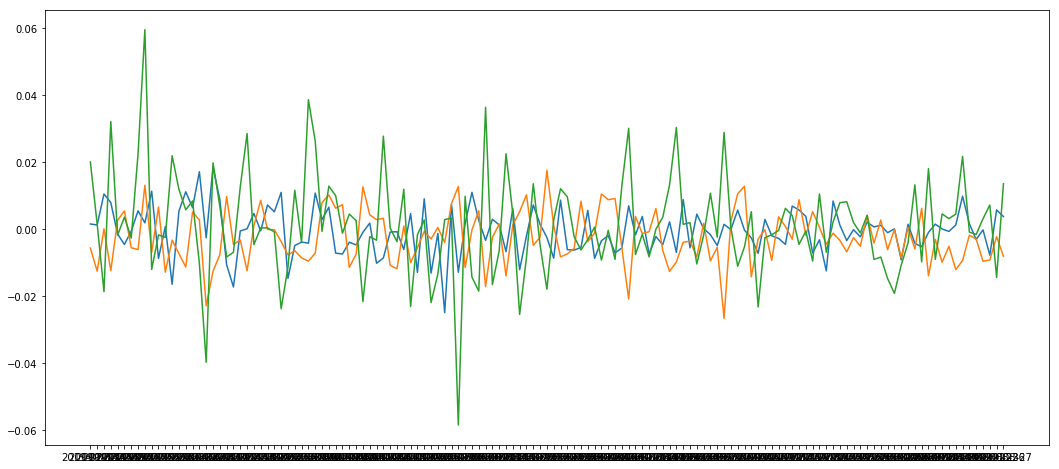

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(SMB[1000:])
plt.plot(HML[1000:])
plt.plot((df_Rm-df_Rf)[1000:])
plt.show()

In [281]:
# building Fama-French 3-Factors-Model

from statsmodels import regression
import statsmodels.api as sm

#dividing all the stocks into six combinations according to their market capitalization and book to price ratio
groups = ['SL','SM','SH','BL','BM','BH']
df_params = pd.DataFrame(index=groups,columns=['constant','Rm-Rf','smb','hml'])

a=0
for i in [SL,SM,SH,BL,BM,BH]:
    Y=(i-df_Rf)[1:]
    X = pd.DataFrame()
    X['Rm_Rf'] = (df_Rm-df_Rf)[1:]
    X['smb'] = SMB[1:]
    X['hml'] = HML[1:]
    X = sm.add_constant(X)

    model = regression.linear_model.OLS(Y.astype(float),X.astype(float))
    results_1 = model.fit()
    
    print(groups[a])
    print(results_1.summary())
    df_params.loc[groups[a]]=results_1.params.tolist()
    a += 1

SL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     8118.
Date:                Sat, 31 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:49:52   Log-Likelihood:                 4656.7
No. Observations:                1134   AIC:                            -9305.
Df Residuals:                    1130   BIC:                            -9285.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      4.079      

In [282]:
# combining Fama-French Model with ECM (Error Correction Model )

a = 0
for i in [SL,SM,SH,BL,BM,BH]:
    Y=(i-df_Rf).diff()[2:]
    
    X = pd.DataFrame()
    X['Rm_Rf'] = (df_Rm-df_Rf).diff()[2:]
    X['smb'] = SMB.diff()[2:]
    X['hml'] = HML.diff()[2:]
    
    Rm_Rf = df_params.loc[groups[a]]['Rm-Rf']
    smb = df_params.loc[groups[a]]['smb']
    hml = df_params.loc[groups[a]]['hml']
    
    X['ECM'] = np.array((i-df_Rf) - (Rm_Rf * (df_Rm-df_Rf) + smb * SMB + hml * HML))[1:-1]
    X = sm.add_constant(X)

    model = regression.linear_model.OLS(Y.astype(float),X.astype(float))
    results_2 = model.fit()
    
    print(groups[a])
    print(results_2.summary())
    a += 1

SL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.181e+04
Date:                Sat, 31 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:50:58   Log-Likelihood:                 4660.1
No. Observations:                1133   AIC:                            -9310.
Df Residuals:                    1128   BIC:                            -9285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      3.831      

In [128]:
print("Rm mean:",np.mean(df_Rm))
print("Rm std:",np.std(df_Rm))
print("Rf mean:",np.mean(df_Rf))
print("Rf std:",np.std(df_Rf))
print("Rm_Rf:",np.mean(df_Rm-df_Rf))
print("Rm_Rf:",np.std(df_Rm-df_Rf))
print("smb mean:",np.mean(SMB))
print("smb std:",np.std(SMB))
print("hml mean:",np.mean(HML))
print("hml std:",np.std(HML))
print("SL mean:",np.mean(SL))
print("SL std:",np.std(SL))
print("SM mean:",np.mean(SM))
print("SM std:",np.std(SM))
print("SH mean:",np.mean(SH))
print("SH std:",np.std(SH))
print("BL mean:",np.mean(BL))
print("BL std:",np.std(BL))
print("BM mean:",np.mean(BM))
print("BM std:",np.std(BM))
print("BH mean:",np.mean(BH))
print("BH std:",np.std(BH))

Rm mean: 0.00016817587355287642
Rm std: 0.015843449661594077
Rf mean: 2.2382797909624684e-05
Rf std: 6.7790458004168325e-06
Rm_Rf: 0.00014579307564325142
Rm_Rf: 0.015843218092678676
smb mean: -0.0005945302628831576
smb std: 0.009224335404760985
hml mean: -0.0012992813585073766
hml std: 0.010712823747273004
SL mean: 0.0010055220472700939
SL std: 0.018913369715268878
SM mean: 0.00033323653678973006
SM std: 0.019302734297073187
SH mean: -0.00038686035221935995
SH std: 0.01798481793011489
BL mean: 0.0012978772556634618
BL std: 0.01923377133469958
BM mean: 0.0013459148266883035
BM std: 0.018278013473193754
BH mean: 9.169693813816639e-05
BH std: 0.014914207829507703


In [35]:
#calculating the correlation coefficient of the three factors

x=np.zeros((3,1135))

x[0]=df_Rm-df_Rf
x[1]=SMB
x[2]=HML

Correlations=pd.DataFrame(np.corrcoef(x))
Correlations.columns=['MF','SMB','HML']
Correlations.index=['MF','SMB','HML']
Correlations

,MF,SMB,HML
MF,1.000000,0.142292,-0.118037
SMB,0.142292,1.000000,-0.354113
HML,-0.118037,-0.354113,1.000000


In [253]:
# training the model of BM combination using Fama French Model,choosing the data of first 60 days in the data set

df_params = pd.DataFrame(index=groups,columns=['constant','Rm-Rf','smb','hml'])

Y=(BM-df_Rf)[1:60]
X = pd.DataFrame()
X['Rm_Rf'] = (df_Rm-df_Rf)[1:60]
X['smb'] = SMB[1:60]
X['hml'] = HML[1:60]
X = sm.add_constant(X)

model = regression.linear_model.OLS(Y.astype(float),X.astype(float))
results_1 = model.fit()

print(results_1.summary())
df_params.loc['BM']=results_1.params.tolist()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     23.06
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           8.53e-10
Time:                        21:25:14   Log-Likelihood:                 175.68
No. Observations:                  59   AIC:                            -343.4
Df Residuals:                      55   BIC:                            -335.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0051      0.002      2.722      0.0

In [255]:
# training the model of BM combining Fama-French Model with ECM (Error Correction Model )

Y=(BM-df_Rf).diff()[2:60]
    
X = pd.DataFrame()
X['Rm_Rf'] = (df_Rm-df_Rf).diff()[2:60]
X['smb'] = SMB.diff()[2:60]
X['hml'] = HML.diff()[2:60]
    
Rm_Rf = df_params.loc['BM']['Rm-Rf']
smb = df_params.loc['BM']['smb']
hml = df_params.loc['BM']['hml']
    
X['ECM'] = np.array((BM-df_Rf) - (Rm_Rf * (df_Rm-df_Rf) + smb * SMB + hml * HML))[1:59]
X = sm.add_constant(X)

model = regression.linear_model.OLS(Y.astype(float),X.astype(float))
results_2 = model.fit()
    
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     70.43
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           1.43e-20
Time:                        21:26:31   Log-Likelihood:                 176.30
No. Observations:                  58   AIC:                            -342.6
Df Residuals:                      53   BIC:                            -332.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.002      3.837      0.0

In [256]:
#building testing date set

Y_1=(BM-df_Rf)[61:200]

X_1 = pd.DataFrame()
X_1['Rm_Rf'] = (df_Rm-df_Rf)[61:200]
X_1['smb'] = SMB[61:200]
X_1['hml'] = HML[61:200]
X_1 = sm.add_constant(X_1)

X_1

,const,Rm_Rf,smb,hml
date,,,,
2015-04-08,1.0,0.008368,-0.040380,-0.015890
2015-04-09,1.0,-0.007861,-0.010438,-0.027525
2015-04-10,1.0,0.019281,0.000942,-0.007991
2015-04-13,1.0,0.017620,0.004793,-0.000935
2015-04-14,1.0,0.003847,-0.003563,-0.003272
2015-04-15,1.0,-0.013017,-0.012978,0.021685
2015-04-16,1.0,0.030348,-0.012439,0.007905
2015-04-17,1.0,0.018276,-0.014814,0.004575
2015-04-20,1.0,-0.016168,-0.005962,-0.001544


In [268]:
#building testing date set

Y_2=(BM-df_Rf).diff()[61:200]
    
X_2 = pd.DataFrame()
X_2['Rm_Rf'] = (df_Rm-df_Rf).diff()[61:200]
X_2['smb'] = SMB.diff()[61:200]
X_2['hml'] = HML.diff()[61:200]
    
Rm_Rf = df_params.loc['BM']['Rm-Rf']
smb = df_params.loc['BM']['smb']
hml = df_params.loc['BM']['hml']
    
X_2['ECM'] = np.array((BM-df_Rf) - (Rm_Rf * (df_Rm-df_Rf) + smb * SMB + hml * HML))[60:199]
X_2 = sm.add_constant(X_2)
X_2

,const,Rm_Rf,smb,hml,ECM
date,,,,,
2015-04-08,1.0,-0.013065,-0.031305,-0.016608,0.012322
2015-04-09,1.0,-0.016229,0.029942,-0.011635,-0.022151
2015-04-10,1.0,0.027142,0.011380,0.019534,-0.026417
2015-04-13,1.0,-0.001661,0.003850,0.007056,0.000508
2015-04-14,1.0,-0.013773,-0.008356,-0.002337,-0.004406
2015-04-15,1.0,-0.016863,-0.009415,0.024957,-0.005919
2015-04-16,1.0,0.043365,0.000539,-0.013780,-0.026886
2015-04-17,1.0,-0.012072,-0.002375,-0.003330,0.002190
2015-04-20,1.0,-0.034444,0.008851,-0.006118,0.003669


In [269]:
y_predict_1 = results_1.predict(X_1)
y_predict_2 = results_2.predict(X_2)

In [270]:
y_predict_2

date
2015-04-08    0.011366
2015-04-09    0.010254
2015-04-10    0.039634
2015-04-13    0.000708
2015-04-14    0.012811
2015-04-15    0.006934
2015-04-16    0.063803
2015-04-17    0.001077
2015-04-20   -0.017820
2015-04-21    0.010788
2015-04-22   -0.048387
2015-04-23   -0.030378
2015-04-24    0.001442
2015-04-27    0.040895
2015-04-28   -0.005836
2015-04-29    0.017491
2015-04-30    0.005116
2015-05-04    0.005854
2015-05-05   -0.001419
2015-05-06    0.050063
2015-05-07    0.018384
2015-05-08    0.006894
2015-05-11    0.007607
2015-05-12   -0.016857
2015-05-13   -0.022477
2015-05-14    0.028078
2015-05-15   -0.019191
2015-05-18    0.038502
2015-05-19    0.032249
2015-05-20   -0.040863
                ...   
2015-09-14    0.018018
2015-09-15    0.023769
2015-09-16    0.053591
2015-09-17   -0.071172
2015-09-18    0.017273
2015-09-21    0.009217
2015-09-22   -0.022058
2015-09-23   -0.002685
2015-09-24    0.030674
2015-09-25    0.001528
2015-09-28    0.019607
2015-09-29   -0.003834
2015-0

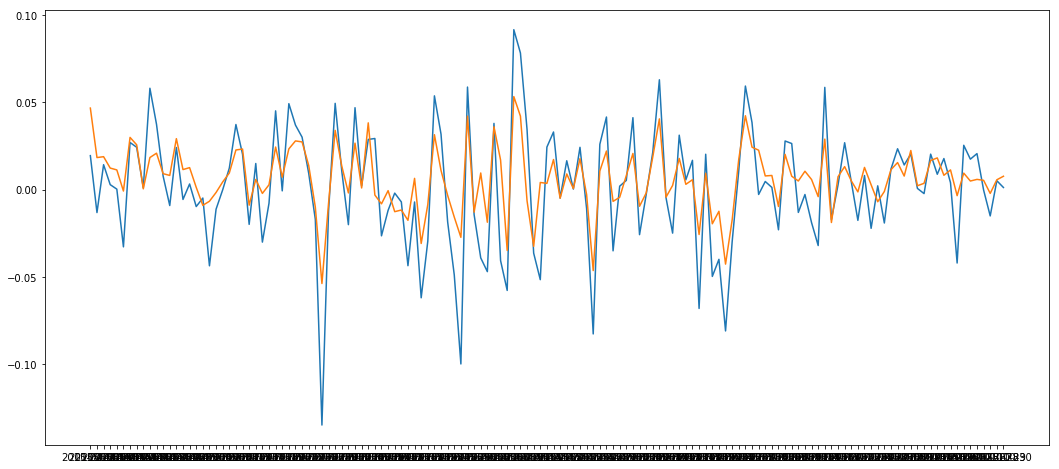

In [279]:
#testing data using Fama French Model
plt.figure(figsize=(18,8))
plt.plot((BM-df_Rf)[61:200], label='data')
plt.plot(y_predict_1, label='data')
plt.show()

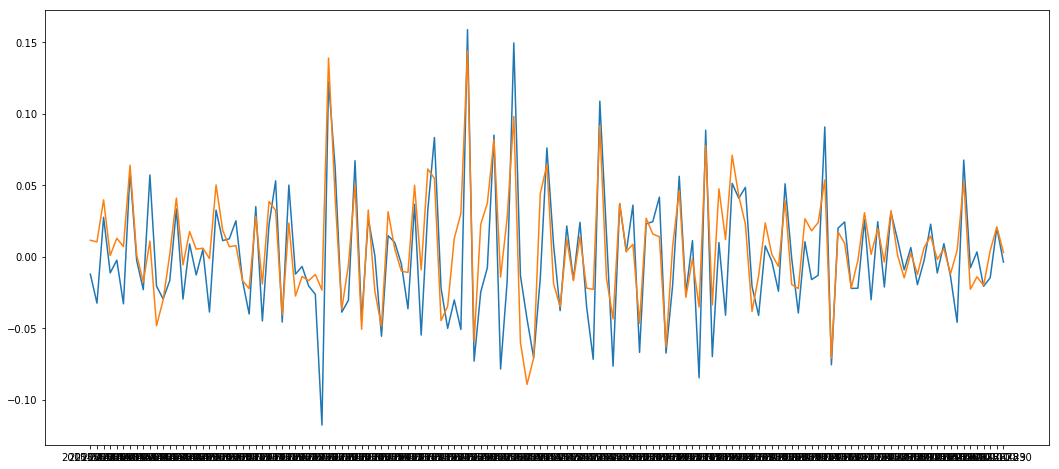

In [271]:
#testing data using new model combining ECM
plt.figure(figsize=(18,8))
plt.plot((BM-df_Rf).diff()[61:200], label='data')
plt.plot(y_predict_2, label='data')
plt.show()

We can see that the original model fits the data not so well when there are some intense short-term fluctuations. However, the impact of these short-term fluctuations has been largely eliminated by our new model.